<a href="https://colab.research.google.com/github/WoradeeKongthong/DataCamp2020_homework/blob/master/ProjectVIII_image_recognition_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : จากการเรียนรู้เรื่อง Convolutional Neural Network ใช้ CNN กับ Dataset ของ CIFAR-10

In [6]:
import keras
import numpy as np
import matplotlib.pyplot as plt

## Load dataset

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [5]:
print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (50000, 32, 32, 3)
y_train shape :  (50000, 1)
X_test shape :  (10000, 32, 32, 3)
y_test shape :  (10000, 1)


In [12]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

bird


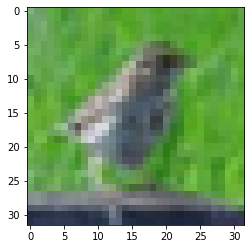

In [35]:
# print and plot examples
randnum = np.random.randint(0, len(X_train))
plt.imshow(X_train[randnum])
print(cifar_classes[y_train[randnum][0]])

## Data Preprocessing

In [26]:
# normalize X_train and X_test
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

In [29]:
# check data
print('X_train_norm dtype : ', X_train_norm.dtype)
print('min : ', X_train_norm.min())
print('max : ', X_train_norm.max())
print()
print('X_test_norm dtype : ', X_test_norm.dtype)
print('min : ', X_test_norm.min())
print('max : ', X_test_norm.max())

X_train_norm dtype :  float64
min :  0.0
max :  1.0

X_test_norm dtype :  float64
min :  0.0
max :  1.0


In [30]:
# make y_train and y_test one-hot
y_train_onehot = keras.utils.to_categorical(y_train, num_classes=10)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes=10)

In [32]:
print('y_train_onehot shape : ', y_train_onehot.shape)
print('y_test_onehot shape : ', y_test_onehot.shape)

y_train_onehot shape :  (50000, 10)
y_test_onehot shape :  (10000, 10)


## CNN model

In [95]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD

In [96]:
# create the CNN model
model = Sequential()
# first conv block
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
# second conv block
model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
# flatten
model.add(Flatten())
# fully connected layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(10, activation='softmax'))

In [97]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [98]:
# print model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

In [99]:
# fit the model
history = model.fit(X_train_norm, y_train_onehot, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 228s 182ms/step - loss: 1.7435 - accuracy: 0.3636 - val_loss: 1.3634 - val_accuracy: 0.5135
Epoch 2/20
1250/1250 [==============================] - 227s 182ms/step - loss: 1.3317 - accuracy: 0.5189 - val_loss: 1.1771 - val_accuracy: 0.5800
Epoch 3/20
1250/1250 [==============================] - 230s 184ms/step - loss: 1.1366 - accuracy: 0.5958 - val_loss: 1.0082 - val_accuracy: 0.6430
Epoch 4/20
1250/1250 [==============================] - 231s 185ms/step - loss: 0.9998 - accuracy: 0.6461 - val_loss: 0.9241 - val_accuracy: 0.6778
Epoch 5/20
1250/1250 [==============================] - 230s 184ms/step - loss: 0.8774 - accuracy: 0.6886 - val_loss: 0.8977 - val_accuracy: 0.6863
Epoch 6/20
1250/1250 [==============================] - 228s 183ms/step - loss: 0.7867 - accuracy: 0.7213 - val_loss: 0.8607 - val_accuracy: 0.7020
Epoch 7/20
1250/1250 [==============================] - 238s 190ms/step - loss: 0.7152 - accuracy: 0.7452 - val_

## Plot the learning curve

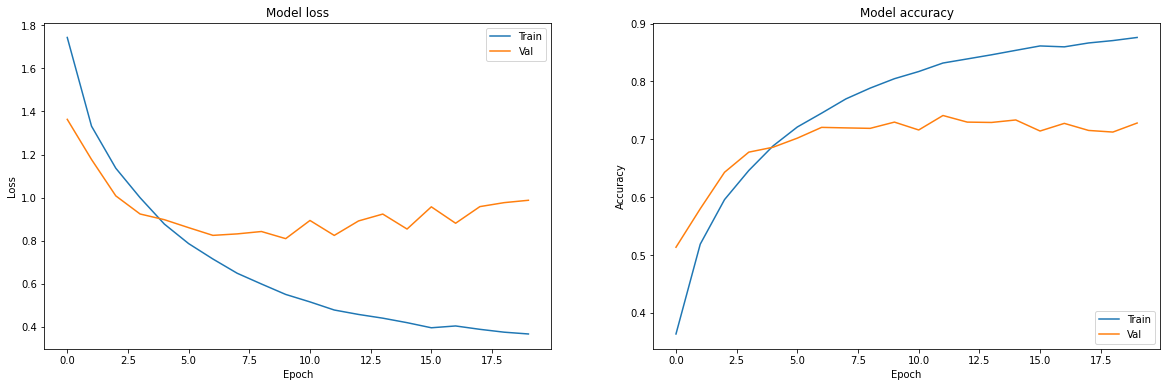

In [100]:
plt.figure(figsize=(20,6))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
#plt.ylim((0,2))

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower right')
plt.show()

## Save the model

In [101]:
model.save('cifar10_cnn.h5')

## Model evaluation

In [48]:
from keras.models import load_model

In [102]:
# load the saved model
model = load_model('cifar10_cnn.h5')

In [103]:
model.evaluate(X_test_norm, y_test_onehot, batch_size=32)

313/313 [==============================] - 13s 42ms/step - loss: 1.0175 - accuracy: 0.7225


[1.0175265073776245, 0.7225000262260437]

## Make prediction on test set

In [104]:
y_pred_prob = model.predict(X_test_norm)

# example output
print('y_pred_prob shape : ', y_pred_prob.shape)
print('example : \n', y_pred_prob[0])

y_pred_prob shape :  (10000, 10)
example : 
 [0.02661409 0.00943623 0.04078814 0.50261724 0.02623851 0.26191947
 0.03226311 0.01571478 0.08057547 0.00383299]


Most likely class: frog -- Probability: 0.6513834
Second most likely class: deer -- Probability: 0.30171555
Third most likely class: bird -- Probability: 0.04632077


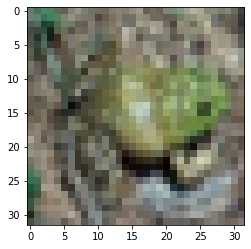

In [115]:
# example of image and prediction

# create random number
randnum = np.random.randint(0,len(X_test))

# plot the random image
plt.imshow(X_test[randnum])

# get the image predicted probabilities and it's index (min-->max)
probabilities = y_pred_prob[randnum]
index = np.argsort(probabilities)

# print the predicted results
print("Most likely class:", cifar_classes[index[-1]], "-- Probability:", probabilities[index[-1]])
print("Second most likely class:", cifar_classes[index[-2]], "-- Probability:", probabilities[index[-2]])
print("Third most likely class:", cifar_classes[index[-3]], "-- Probability:", probabilities[index[-3]])

In [116]:
# convert y_pred_prob to integer label
y_pred = np.array(list(map(np.argmax, y_pred_prob))).reshape(-1,1)

print('first 10 example')
print('y_test : ', y_test[:10, 0])
print('y_pred : ', y_pred[:10,0])

first 10 example
y_test :  [3 8 8 0 6 6 1 6 3 1]
y_pred :  [3 1 0 0 6 6 1 3 3 1]


In [117]:
# Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[828,  15,  41,  14,  18,  10,   8,  13,  35,  18],
       [ 21, 855,   2,   9,   6,   7,   6,   8,  22,  64],
       [ 92,   2, 612,  54,  70,  66,  43,  37,  15,   9],
       [ 40,   8,  70, 499,  57, 204,  61,  42,   6,  13],
       [ 29,   6,  80,  51, 679,  42,  37,  65,   9,   2],
       [ 13,   4,  52, 157,  38, 645,  20,  58,   8,   5],
       [  7,   4,  62,  74,  62,  37, 727,  15,   7,   5],
       [ 16,   4,  34,  38,  42,  49,   5, 796,   2,  14],
       [105,  29,  17,  12,   3,   8,   7,   9, 791,  19],
       [ 32,  80,   6,  17,   4,  14,   2,  19,  33, 793]])